In [1]:
# DCD node 82-- sucking dry because bathy is bad (probably).
# check DEMS.
import matplotlib.pyplot as plt
import stompy.model.delft.dflow_model as dfm
import stompy.model.hydro_model as hm
import xarray as xr
import pandas as pd
import numpy as np
%matplotlib notebook

In [2]:
run_dir="data_3d_2019_summer"
model=dfm.DFlowModel.load(run_dir)

# There's a cell in the Undine portion of Old River that is responsible for
# all of the step limitations.
# Salinity is 32.0 everywhere, slightly higher at ocean BC.
# Nearly 1m/s ucmag-avg in the neighborhood.  Is this a DCD issue?
# Maybe I forgot to scale units on DCD? Fixed that.
# I think the issue now is that there is extraction along that channel
# but the resolution so low that it's not hydraulically connected and fairly
# quick runs out of water.

# DEM doesn't look awful...
# But it does look quite shallow around here.
# Could be an issue with BedLevType?
# or just need smarter bathy setting? was already 6, which is decent.
# changed bedlevtype and bathy setting to follow pescadero. fingers crossed.


In [3]:
map_ds=model.map_dataset()

INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Remo

INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (6)
INFO:UnstructuredGrid:max_sides is okay (6)
INFO:UnstructuredGrid:max_sides is okay (6)
INFO:UnstructuredGrid:max_sides is okay (6)


In [7]:
list(map_ds)

['projected_coordinate_system',
 'mesh2d',
 'mesh2d_node_z',
 'mesh2d_edge_nodes',
 'mesh2d_face_nodes',
 'mesh2d_edge_faces',
 'mesh2d_face_x_bnd',
 'mesh2d_face_y_bnd',
 'mesh2d_interface_sigma',
 'mesh2d_edge_type',
 'mesh2d_bldepth',
 'mesh2d_flowelem_ba',
 'mesh2d_flowelem_bl',
 'mesh2d_flowelem_domain',
 'mesh2d_flowelem_globalnr',
 'timestep',
 'mesh2d_Numlimdt',
 'mesh2d_s1',
 'mesh2d_s0',
 'mesh2d_waterdepth',
 'mesh2d_u1',
 'mesh2d_u0',
 'mesh2d_ucx',
 'mesh2d_ucy',
 'mesh2d_ucz',
 'mesh2d_ucxa',
 'mesh2d_ucya',
 'mesh2d_ucmag',
 'mesh2d_ucmaga',
 'mesh2d_rho',
 'mesh2d_q1',
 'mesh2d_viu',
 'mesh2d_diu',
 'mesh2d_taus',
 'mesh2d_czs',
 'mesh2d_czu',
 'mesh2d_sa1',
 'mesh2d_turkin1',
 'mesh2d_vicwwu',
 'mesh2d_tureps1']

In [7]:
map_ds.time

<xarray.DataArray 'time' (time: 12)>
array(['2019-04-01T00:00:00.000000000', '2019-04-01T01:00:00.000000000',
       '2019-04-01T02:00:00.000000000', '2019-04-01T03:00:00.000000000',
       '2019-04-01T04:00:00.000000000', '2019-04-01T05:00:00.000000000',
       '2019-04-01T06:00:00.000000000', '2019-04-01T07:00:00.000000000',
       '2019-04-01T08:00:00.000000000', '2019-04-01T09:00:00.000000000',
       '2019-04-01T10:00:00.000000000', '2019-04-01T10:22:32.595238510'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2019-04-01 ... 2019-04-01T10:22:32.595238510
Attributes:
    standard_name:  time

In [14]:
import sfb_csc
model=sfb_csc.SfbCsc.load(run_dir)

INFO:HydroModel:Duplicating depth to node_z_bed for less ambiguous naming, and assuming it was already positive-up


132935 nodes will get default of 0.02


In [24]:
sources=model.bathy_sources("base")
from stompy.spatial import field

dem=field.MultiRasterField(sources)
tile=dem.extract_tile(zoom,res=1.0)

<IPython.core.display.Javascript object>


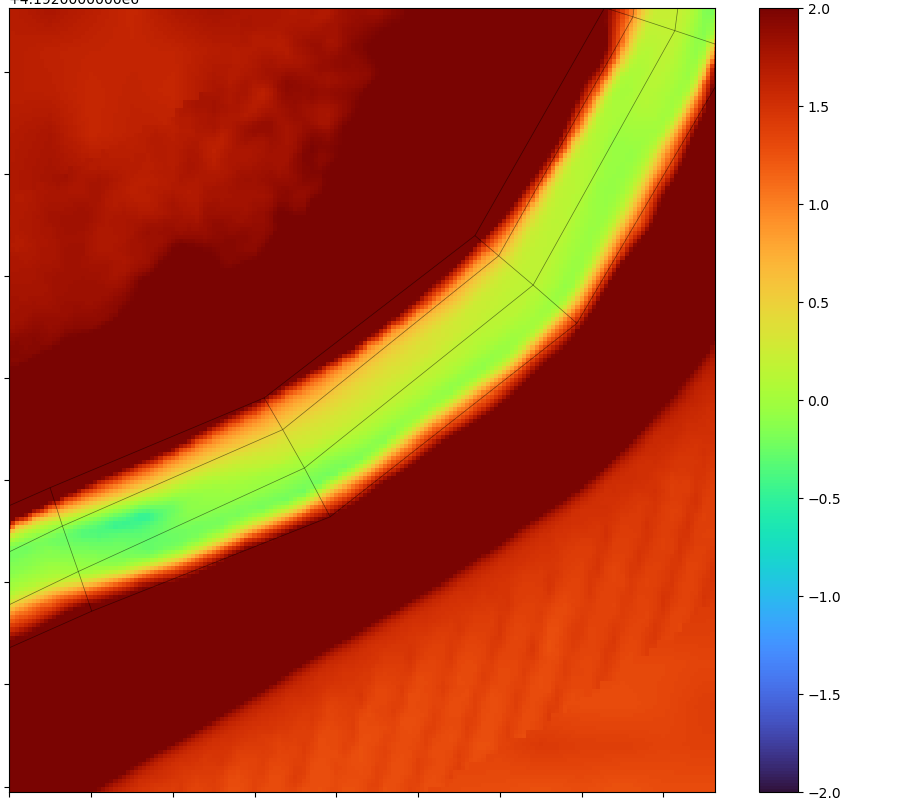

(642442.9347290101, 642855.9497524875, 4192653.4561333177, 4193112.3617149615)

In [25]:
fig,ax=plt.subplots(figsize=(9,8))
ax.set_adjustable('datalim')

numlimdt=map_ds['mesh2d_Numlimdt'].isel(time=-1).values
#coll=map_ds.grid.plot_cells(values=numlimdt,
#                       cmap='turbo')

#z_bed=map_ds['mesh2d_flowelem_bl'].values
#coll=map_ds.grid.plot_cells(values=z_bed,cmap='turbo',clim=[-2,2])

#s1=map_ds['mesh2d_s1'].isel(time=8).values
#coll=map_ds.grid.plot_cells(values=s1,cmap='turbo',clim=[-2,2])
coll=None

map_ds.grid.plot_edges(color='k',lw=0.5,alpha=0.5)
img=tile.plot(ax=ax,cmap='turbo')
img.set_clim([-2,2])
plt.colorbar(img)


c=np.argmax(numlimdt)

map_ds.grid.plot_cells(mask=[c],labeler='id',color='none')

coll and plt.colorbar(coll)
fig.subplots_adjust(0.01,0.01,0.99,0.99)
zoom=(642442.9347290101, 642855.9497524875, 4192653.4561333177, 4193112.3617149615)

ax.axis(zoom)

In [ ]:
plt.figure()

<IPython.core.display.Javascript object>


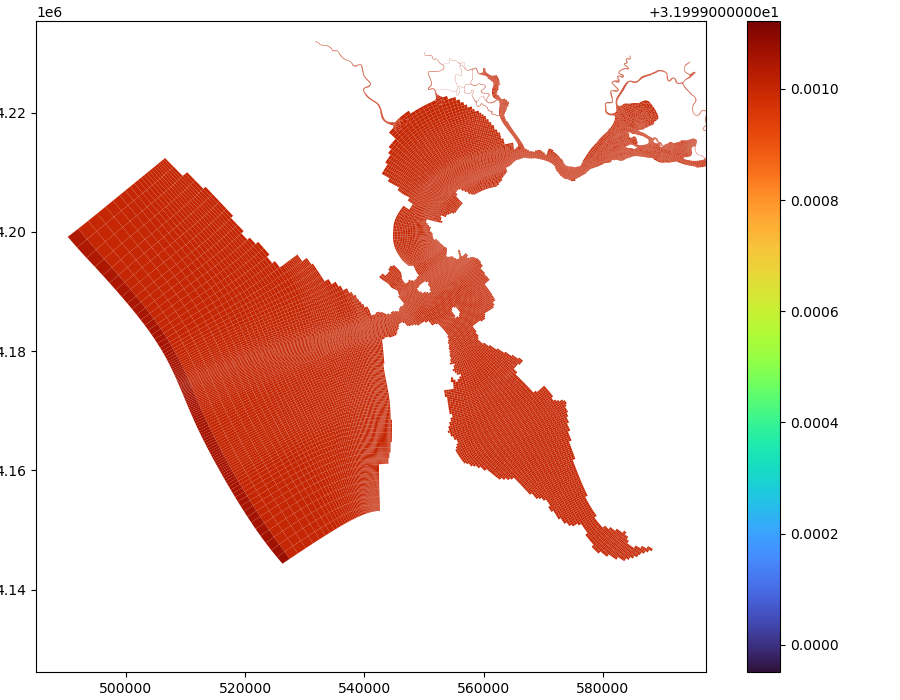

In [30]:
fig,ax=plt.subplots(figsize=(9,7))
ax.set_adjustable('datalim')

scal=map_ds['mesh2d_sa1'].isel(time=-1).values
scal=scal.mean(axis=1)

coll=map_ds.grid.plot_cells(values=scal, cmap='turbo')
c=np.argmax(numlimdt)

map_ds.grid.plot_cells(mask=[c],labeler='id',color='none')

plt.colorbar(coll)
fig.subplots_adjust(0.04,0.04,0.97,0.97)

<IPython.core.display.Javascript object>


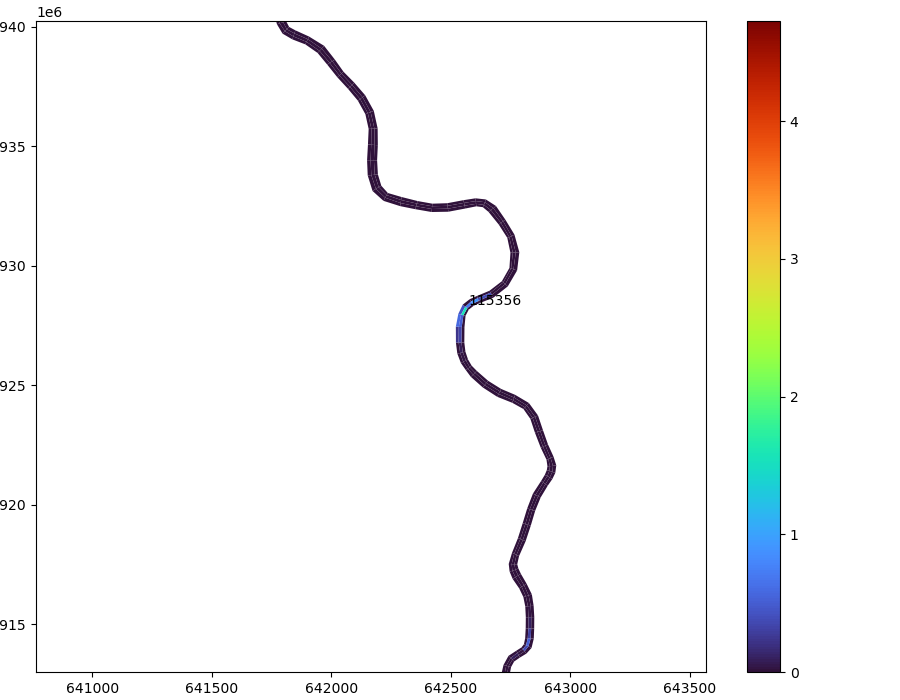

In [31]:
fig,ax=plt.subplots(figsize=(9,7))
ax.set_adjustable('datalim')

scal=map_ds['mesh2d_ucmag'].isel(time=-1).values
scal=scal.mean(axis=1)

coll=map_ds.grid.plot_cells(values=scal, cmap='turbo')
c=np.argmax(numlimdt)

map_ds.grid.plot_cells(mask=[c],labeler='id',color='none')

plt.colorbar(coll)
fig.subplots_adjust(0.04,0.04,0.97,0.97)

In [32]:
bcs=model.load_bcs()

Encountered 1 BCs with quantity=salinitybnd that weren't fully parsed
Encountered 282 BCs with quantity=discharge_salinity_temperature_sorsin that weren't fully parsed


In [34]:
# HERE - have dflow_model put coordinates on source/sink BCs.
# plot DCD.
# See if something funny is going on here.

{'QUANTITY': 'dischargebnd',
 'FILENAME': 'Barker_Pumping_Plant.pli',
 'FILETYPE': '9',
 'METHOD': '3',
 'OPERAND': 'O',
 'name': 'Barker_Pumping_Plant',
 'pli': [('Barker_Pumping_Plant', array([[ 605235.08884454, 4237148.13967463],
          [ 605196.61242016, 4237128.78965573]]), ['', ''])],
 'coordinates': array([[ 605235.08884454, 4237148.13967463],
        [ 605196.61242016, 4237128.78965573]]),
 'geom': <shapely.geometry.linestring.LineString at 0x150ba152bba8>,
 'data': <xarray.Dataset>
 Dimensions:  (time: 64)
 Coordinates:
   * time     (time) datetime64[ns] 2019-03-31T07:00:00 ... 2019-06-02T07:00:00
 Data variables:
     flow     (time) float64 -0.1416 -0.0 -0.1133 ... -1.812 -1.954 -1.812
     x        float64 6.052e+05
     y        float64 4.237e+06
 Attributes:
     source:   data_2d_2019_summer/Barker_Pumping_Plant_0001.tim,
 'bc': <stompy.model.hydro_model.FlowBC at 0x150ba14cbc88>}